In [2]:
import pandas as pd
import random
from scipy.spatial.distance import cosine
import scipy
import scipy.stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms 
import numpy as np 

<h2> Pearson's Correlation Collaborative Filter Random Dataset </h2>

In [3]:
read_data = pd.read_csv("file4.csv")
data = read_data.drop('user', 1)

In [4]:
def pearsonitem(): 
    d = pd.DataFrame(index=data.columns, columns=data.columns) 
    for i in range(0,len(d.columns)) :
        for j in range(0,len(d.columns)) :
            d.iloc[i,j] = scipy.stats.pearsonr(data.iloc[:,i],data.iloc[:,j])[0]
    neighbour_val = pd.DataFrame(index=d.columns,columns=range(1,11))
    for i in range(0,len(d.columns)):
        neighbour_val.iloc[i,:10] = d.iloc[0:,i].sort_values(ascending=False)[:10].index    
    
    return neighbour_val

In [5]:
res=[]
def itemtoitemCFP(user,num):
    neighbour_val=pearsonitem()
    for i in range (num):
        if user == neighbour_val.values.tolist()[i][0]:
            res.append(neighbour_val.values.tolist()[i][1:num+1])
            print("User ID should look at Items "+ str(neighbour_val.values.tolist()[i][1:num+1]))
   

In [6]:
itemtoitemCFP('item11',10)

User ID should look at Items ['item1', 'item7', 'item3', 'item2', 'item16', 'item4', 'item15', 'item13', 'item17']


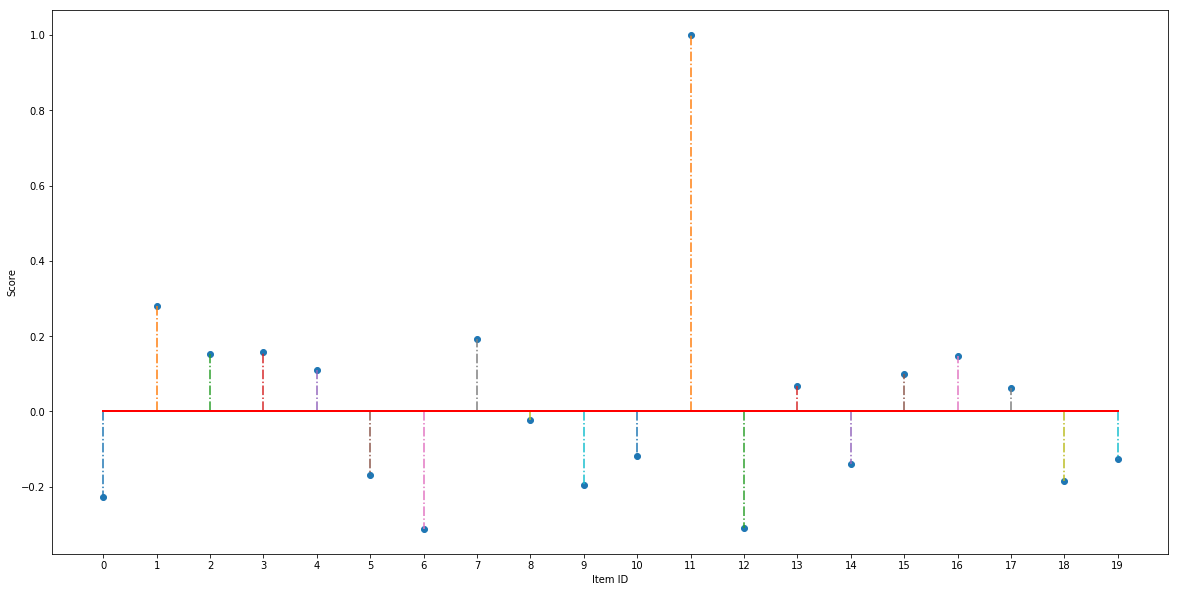

In [7]:
plt.figure(figsize=(20,10))
x = list(range(0,20))
y =[-0.227877,0.281358,0.153823,0.15896,0.110237,-0.169205,-0.312409,0.191872,-0.0229456,-0.196369,-0.118229,1,-0.309637,0.0671156,-0.138494,0.0982472,0.146499,0.0622482,-0.185735,-0.125951]
markerline, stemlines, baseline = plt.stem(x, y, '-.')
plt.setp(baseline, color='r', linewidth=2)
plt.xticks(x)
plt.xlabel('Item ID', fontdict=None, labelpad=None)
plt.ylabel('Score', fontdict=None, labelpad=None)
plt.show()

<h2> Pearson's Correlation Collaborative Filter Non-Random Dataset </h2>

In [9]:
read_data = pd.read_csv("file5.csv")
data = read_data.drop('user', 1)

In [81]:
d = pd.DataFrame(index=data.columns, columns=data.columns)
def pearsonitem():
    
    for i in range(0,len(d.columns)) :
        for j in range(0,len(d.columns)) :
            d.iloc[i,j] = scipy.stats.pearsonr(data.iloc[:,i],data.iloc[:,j])[0]       
    neighbour_val = pd.DataFrame(index=d.columns,columns=range(1,11))
    for i in range(0,len(d.columns)):
        neighbour_val.iloc[i,:10] = d.iloc[0:,i].sort_values(ascending=False)[:10].index
    
    return neighbour_val

In [82]:
res=[]

def itemtoitemCFP(user,num):
    
    neighbour_val=pearsonitem()
    
    for i in range (num):
        if user == neighbour_val.values.tolist()[i][0]:
            res.append(neighbour_val.values.tolist()[i][1:num+1])
            print("User ID should look at Items "+ str(neighbour_val.values.tolist()[i][1:num+1]))

In [83]:
itemtoitemCFP('item11',10)

User ID should look at Items ['item1', 'item7', 'item3', 'item2', 'item16', 'item4', 'item15', 'item13', 'item17']


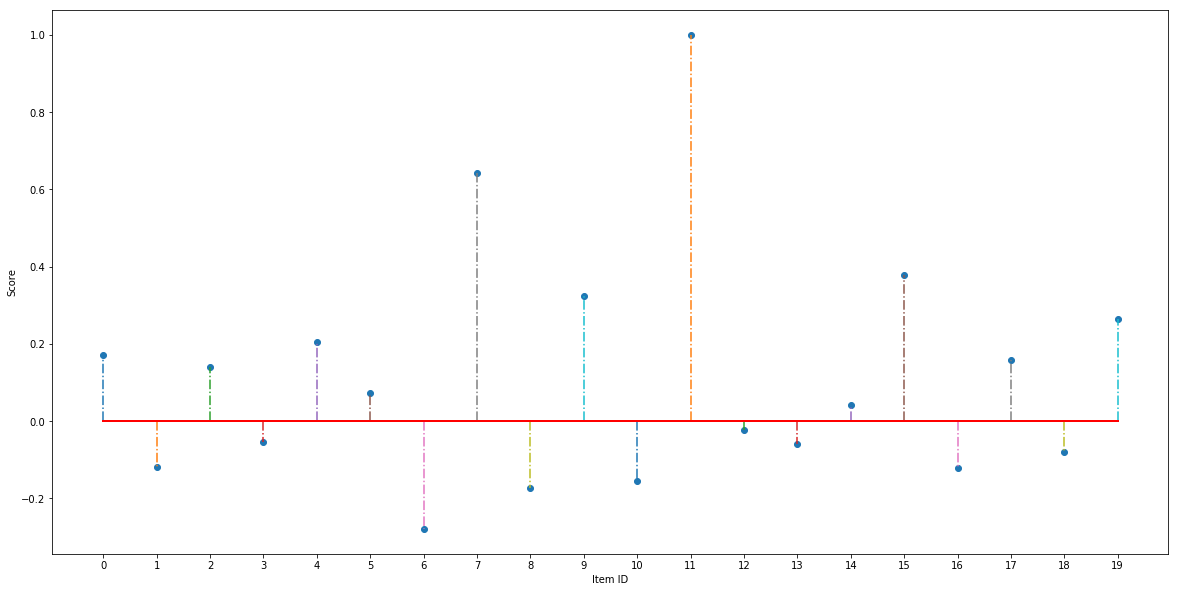

In [84]:
plt.figure(figsize=(20,10))
x = list(range(0,20))
y =[0.170645,-0.11929,0.139276,-0.0537552,0.204511,0.0718112,-0.279879,0.64111,-0.173184,0.323546,-0.15526,1,-0.0237102,-0.0590899,0.0418899,0.37822,-0.121829,0.157576,-0.081337,0.26307]
markerline, stemlines, baseline = plt.stem(x, y, '-.')
plt.setp(baseline, color='r', linewidth=2)
plt.xticks(x)
plt.xlabel('Item ID', fontdict=None, labelpad=None)
plt.ylabel('Score', fontdict=None, labelpad=None)
plt.show()

In [85]:
 print(d.head(20).iloc[:20,0:20])

            item0       item1     item10     item11      item12     item13  \
item0           1   -0.297678   0.184124  -0.227877  -0.0106825  -0.619268   
item1   -0.297678           1 -0.0437061   0.281358  0.00374323   0.387225   
item10   0.184124  -0.0437061          1  -0.118229    0.125401  -0.278144   
item11  -0.227877    0.281358  -0.118229          1   -0.309637  0.0671156   
item12 -0.0106825  0.00374323   0.125401  -0.309637           1  0.0555842   
item13  -0.619268    0.387225  -0.278144  0.0671156   0.0555842          1   
item14  0.0180263   0.0884315   0.252191  -0.138494   -0.071252 -0.0781632   
item15   0.231318   -0.276026  -0.244296  0.0982472  -0.0379712  -0.234216   
item16   0.123944     0.04009   0.492142   0.146499    0.181073 -0.0661451   
item17  -0.143589   -0.452832  -0.207811  0.0622482   -0.313615 -0.0463739   
item18   0.181506    0.106495    0.36043  -0.185735    0.255151  -0.197671   
item19   0.146937  -0.0280842  0.0257764  -0.125951   -0.258846 